# Feature Selection 

Testing some methods for features selection and target definition 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load the dataframe

In [2]:
path = r"C:\Users\TALAE LOCAL\Desktop\weldb_clean.csv"  # path to the clean csv 
df = pd.read_csv(path)

In [3]:
df

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Charpy temperature / °C,Charpy impact toughness / J,Hardness / kgmm-2,50 % FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggreagate / %,Weld ID
0,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,-28.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.037,0.30,0.65,0.008,0.012,0.00,NaN,NaN,NaN,NaN,...,-38.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.037,0.31,1.03,0.007,0.014,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.037,0.31,1.03,0.007,0.014,0.00,NaN,NaN,NaN,NaN,...,-48.0,100.0,NaN,NaN,32.0,28.0,40.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,0.60,8.6,0.98,0.18,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1648,0.088,0.36,0.88,0.008,0.017,0.57,8.4,0.94,0.19,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1649,0.090,0.34,0.89,0.008,0.016,0.17,8.2,0.94,0.02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1650,0.092,0.35,0.90,0.008,0.016,0.54,8.4,0.97,0.17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning

In [4]:
df.describe()

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Nickel concentration / (weight%),Chromium concentration / (weight%),Molybdenum concentration / (weight%),Vanadium concentration / (weight%),Copper concentration / (weight%),...,Charpy temperature / °C,Charpy impact toughness / J,Hardness / kgmm-2,50 % FATT,Primary ferrite in microstructure / %,Ferrite with second phase / %,Acicular ferrite / %,Martensite / %,Ferrite with carbide aggreagate / %,Weld ID
count,1652.000000,1652.000000,1652.000000,1641.000000,1642.000000,697.000000,784.000000,791.000000,620.000000,564.000000,...,879.000000,879.00000,80.000000,31.000000,96.000000,90.000000,90.000000,89.000000,89.000000,0.0
mean,0.075521,0.328577,1.202821,0.009561,0.012952,0.415034,2.101273,0.480358,0.072443,0.176188,...,-34.606371,87.68942,215.700000,-31.096774,19.552083,25.955556,52.833333,0.337079,0.438202,NaN
std,0.023898,0.112455,0.382137,0.011239,0.019627,0.786951,3.026548,0.477423,0.096364,0.325897,...,34.738624,50.11670,24.656321,43.644285,10.773134,21.283486,23.483798,3.179994,1.397685,NaN
min,0.029000,0.040000,0.270000,0.001000,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-114.000000,3.00000,154.000000,-126.000000,0.000000,3.000000,0.000000,0.000000,0.000000,NaN
25%,0.061750,0.270000,0.940000,0.006000,0.007000,0.000000,0.000000,0.000000,0.004000,0.000000,...,-60.000000,38.00000,193.750000,-62.000000,13.750000,9.000000,35.500000,0.000000,0.000000,NaN
50%,0.074000,0.320000,1.270000,0.007000,0.010000,0.067000,0.530000,0.340000,0.015000,0.030000,...,-40.000000,100.00000,221.000000,-15.000000,19.000000,18.000000,60.000000,0.000000,0.000000,NaN
75%,0.086000,0.360000,1.440000,0.010000,0.014000,0.260000,2.300000,1.010000,0.180000,0.190000,...,-17.500000,100.00000,231.000000,5.000000,24.000000,38.000000,71.750000,0.000000,0.000000,NaN
max,0.180000,1.140000,2.250000,0.140000,0.250000,3.500000,10.200000,1.500000,0.320000,1.630000,...,188.000000,270.00000,265.000000,30.000000,48.000000,100.000000,88.000000,30.000000,8.000000,NaN


Drop the categorical columns for later and keep it in a numerical dataframe df_num

In [5]:
cat_cols = ['Weld ID', 'Type of weld;','AC or DC', 'Electrode positive or negative'] 
df_num = df.drop(columns=cat_cols).copy()

#### 1. Drop missing values and imputation

If more than 50% of values are missing → drop them (risk of bias otherwise)

In [6]:
threshold = 0.5
df = df.loc[:, df.isnull().mean() < threshold]

In [7]:
df

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Oxygen concentration / parts per million by weight,Titanium concentration / parts per million by weight,Nitrogen concentration / parts per million by weight,Current / A,Voltage / V,Heat input / kJmm-1,Interpass temperature / °C,Post weld heat treatment temperature / °C,Post weld heat treatment time / hours,Charpy temperature / °C,Charpy impact toughness / J
0,0.037,0.30,0.65,0.008,0.012,NaN,NaN,NaN,170.0,21.0,1.0,200.0,250.0,14.0,NaN,NaN
1,0.037,0.30,0.65,0.008,0.012,NaN,NaN,NaN,170.0,21.0,1.0,200.0,0.0,0.0,-28.0,100.0
2,0.037,0.30,0.65,0.008,0.012,NaN,NaN,NaN,170.0,21.0,1.0,200.0,580.0,2.0,-38.0,100.0
3,0.037,0.31,1.03,0.007,0.014,NaN,NaN,NaN,170.0,21.0,1.0,200.0,250.0,14.0,NaN,NaN
4,0.037,0.31,1.03,0.007,0.014,NaN,NaN,NaN,170.0,21.0,1.0,200.0,0.0,0.0,-48.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1647,0.100,0.35,0.90,0.008,0.016,368.0,NaN,398.0,450.0,30.0,2.0,200.0,760.0,2.0,NaN,NaN
1648,0.088,0.36,0.88,0.008,0.017,441.0,NaN,394.0,450.0,30.0,2.0,200.0,760.0,2.0,NaN,NaN
1649,0.090,0.34,0.89,0.008,0.016,396.0,NaN,96.0,450.0,30.0,2.0,200.0,760.0,2.0,NaN,NaN
1650,0.092,0.35,0.90,0.008,0.016,426.0,NaN,99.0,450.0,30.0,2.0,200.0,760.0,2.0,NaN,NaN


In [8]:
df.columns 

Index(['Carbon concentration / (weight%)', 'Silicon concentration / (weight%)',
       'Manganese concentration / (weight%)',
       'Sulphur concentration / (weight%)',
       'Phosphorus concentration / (weight%)',
       'Oxygen concentration / parts per million by weight',
       'Titanium concentration / parts per million by weight',
       'Nitrogen concentration / parts per million by weight', 'Current / A',
       'Voltage / V', 'Heat input / kJmm-1', 'Interpass temperature / °C',
       'Post weld heat treatment temperature / °C',
       'Post weld heat treatment time / hours', 'Charpy temperature / °C',
       'Charpy impact toughness / J'],
      dtype='object')

In [9]:
df.describe()

,Carbon concentration / (weight%),Silicon concentration / (weight%),Manganese concentration / (weight%),Sulphur concentration / (weight%),Phosphorus concentration / (weight%),Oxygen concentration / parts per million by weight,Titanium concentration / parts per million by weight,Nitrogen concentration / parts per million by weight,Current / A,Voltage / V,Heat input / kJmm-1,Interpass temperature / °C,Post weld heat treatment temperature / °C,Post weld heat treatment time / hours,Charpy temperature / °C,Charpy impact toughness / J
count,1652.000000,1652.000000,1652.000000,1641.000000,1642.000000,1256.000000,865.000000,1183.000000,1404.000000,1404.000000,1652.000000,1614.000000,1639.000000,1639.000000,879.000000,879.00000
mean,0.075521,0.328577,1.202821,0.009561,0.012952,441.967357,81.268786,113.378698,283.843661,27.607379,1.700987,204.902726,304.674192,5.049652,-34.606371,87.68942
std,0.023898,0.112455,0.382137,0.011239,0.019627,147.483825,100.110707,95.902889,192.560955,12.555629,1.298465,39.550604,285.498003,6.096034,34.738624,50.11670
min,0.029000,0.040000,0.270000,0.001000,0.002000,132.000000,0.000000,21.000000,115.000000,11.500000,0.600000,20.000000,0.000000,0.000000,-114.000000,3.00000
25%,0.061750,0.270000,0.940000,0.006000,0.007000,370.000000,30.000000,72.000000,170.000000,21.000000,1.000000,200.000000,0.000000,0.000000,-60.000000,38.00000
50%,0.074000,0.320000,1.270000,0.007000,0.010000,423.000000,41.000000,83.000000,170.000000,21.000000,1.000000,200.000000,250.000000,2.000000,-40.000000,100.00000
75%,0.086000,0.360000,1.440000,0.010000,0.014000,471.000000,110.000000,106.500000,300.000000,30.000000,2.000000,200.000000,580.000000,10.000000,-17.500000,100.00000
max,0.180000,1.140000,2.250000,0.140000,0.250000,1650.000000,690.000000,552.000000,900.000000,75.360000,7.900000,300.000000,760.000000,24.000000,188.000000,270.00000


- Sulphur (0.7% missing → 11/1652) : Highly skewed distribution (median = 0.007 vs max = 0.14) → Median imputation is best, since it’s robust to outliers.

- Phosphorus (0.6% missing → 10/1652) : Skewed distribution (median = 0.010 vs max = 0.25) → Median imputation.

- Oxygen (24% missing → 396/1652) : Skewed with long tail (median = 423 vs max = 1650) → Median imputation .

- Titanium (47.6% missing → 787/1652) : Nearly half missing, skewed (median = 41, mean = 81, max = 690) → Median imputation, but note the high missingness → could also be considered for dropping.

- Nitrogen (28.4% missing → 469/1652) : Moderate missingness, skewed (21–552 ppm) → Median imputation.

- Current (15% missing → 248/1652) : Broad range with some very high values (115–900 A) → Median imputation to avoid bias from outliers.

- Voltage (15% missing → 248/1652) : Relatively symmetric distribution (11.5–75.4 V) → Mean imputation is appropriate.

- Interpass temperature (2.3% missing → 38/1652) : Most values clustered around 200 °C → Mode imputation (preserves categorical-like nature).

- Post weld heat treatment (PWHT) temperature (0.8% missing → 13/1652) : Many values are 0 (no treatment), some higher (up to 760 °C) → Impute missing with 0, reflecting “no treatment.”

- PWHT time (0.8% missing → 13/1652) : Similar to above: mostly 0, some up to 24 h → Impute missing with 0.

- Charpy temperature (46.8% missing → 773/1652) : test condition, includes negatives (down to –114 °C) → Do not impute if used as a target/test condition.

- Charpy impact toughness (46.8% missing → 773/1652) : Output property of welds (mechanical performance) → Do not impute if used as target; drop rows with missing if supervised, or exclude from PCA in unsupervised. For the moment we will test the median imputation. 

In [10]:
from sklearn.impute import SimpleImputer

#Drop the Charpy Temperature does not affect the quality od the welding 
df = df.drop(columns=['Charpy temperature / °C'])

# Define feature groups

# Median imputation
median_cols = [
    'Sulphur concentration / (weight%)',
    'Phosphorus concentration / (weight%)',
    'Oxygen concentration / parts per million by weight',
    'Titanium concentration / parts per million by weight',
    'Nitrogen concentration / parts per million by weight',
    'Current / A',
    'Charpy impact toughness / J'   # <-- testing median imputation
]

# Mean imputation
mean_cols = ['Voltage / V']

# Mode imputation
mode_cols = ['Interpass temperature / °C']

# Zero imputation
zero_cols = [
    'Post weld heat treatment temperature / °C',
    'Post weld heat treatment time / hours'
]

# Apply imputations directly on df
# Median
df[median_cols] = SimpleImputer(strategy="median").fit_transform(df[median_cols])

# Mean
df[mean_cols] = SimpleImputer(strategy="mean").fit_transform(df[mean_cols])

# Mode (most frequent)
df[mode_cols] = SimpleImputer(strategy="most_frequent").fit_transform(df[mode_cols])

# Zero fill
df[zero_cols] = df[zero_cols].fillna(0)

# Quick check: any NaN left?

print(df.isna().sum())


Carbon concentration / (weight%)                        0
Silicon concentration / (weight%)                       0
Manganese concentration / (weight%)                     0
Sulphur concentration / (weight%)                       0
Phosphorus concentration / (weight%)                    0
Oxygen concentration / parts per million by weight      0
Titanium concentration / parts per million by weight    0
Nitrogen concentration / parts per million by weight    0
Current / A                                             0
Voltage / V                                             0
Heat input / kJmm-1                                     0
Interpass temperature / °C                              0
Post weld heat treatment temperature / °C               0
Post weld heat treatment time / hours                   0
Charpy impact toughness / J                             0
dtype: int64


#### 2. Scale Up 

- Some are percentages (Carbon, Silicon, …).

- Some are ppm (Oxygen, Titanium, Nitrogen).

- Some are physical process parameters (Current, Voltage, Heat input, Temperature).

- Target-like variable: Charpy impact toughness (J) seems like an output property of the weld (mechanical performance).

Need to scale up all these numerical feartures 

Need to ckeck if the dis are normal to do StandardScaler else w neeed to do MinMax maybe !! 

array([[<Axes: title={'center': 'Carbon concentration / (weight%)'}>,
        <Axes: title={'center': 'Silicon concentration / (weight%)'}>,
        <Axes: title={'center': 'Manganese concentration / (weight%)'}>,
        <Axes: title={'center': 'Sulphur concentration / (weight%)'}>],
       [<Axes: title={'center': 'Phosphorus concentration / (weight%)'}>,
        <Axes: title={'center': 'Oxygen concentration / parts per million by weight'}>,
        <Axes: title={'center': 'Titanium concentration / parts per million by weight'}>,
        <Axes: title={'center': 'Nitrogen concentration / parts per million by weight'}>],
       [<Axes: title={'center': 'Current / A'}>,
        <Axes: title={'center': 'Voltage / V'}>,
        <Axes: title={'center': 'Heat input / kJmm-1'}>,
        <Axes: title={'center': 'Interpass temperature / °C'}>],
       [<Axes: title={'center': 'Post weld heat treatment temperature / °C'}>,
        <Axes: title={'center': 'Post weld heat treatment time / hours'}

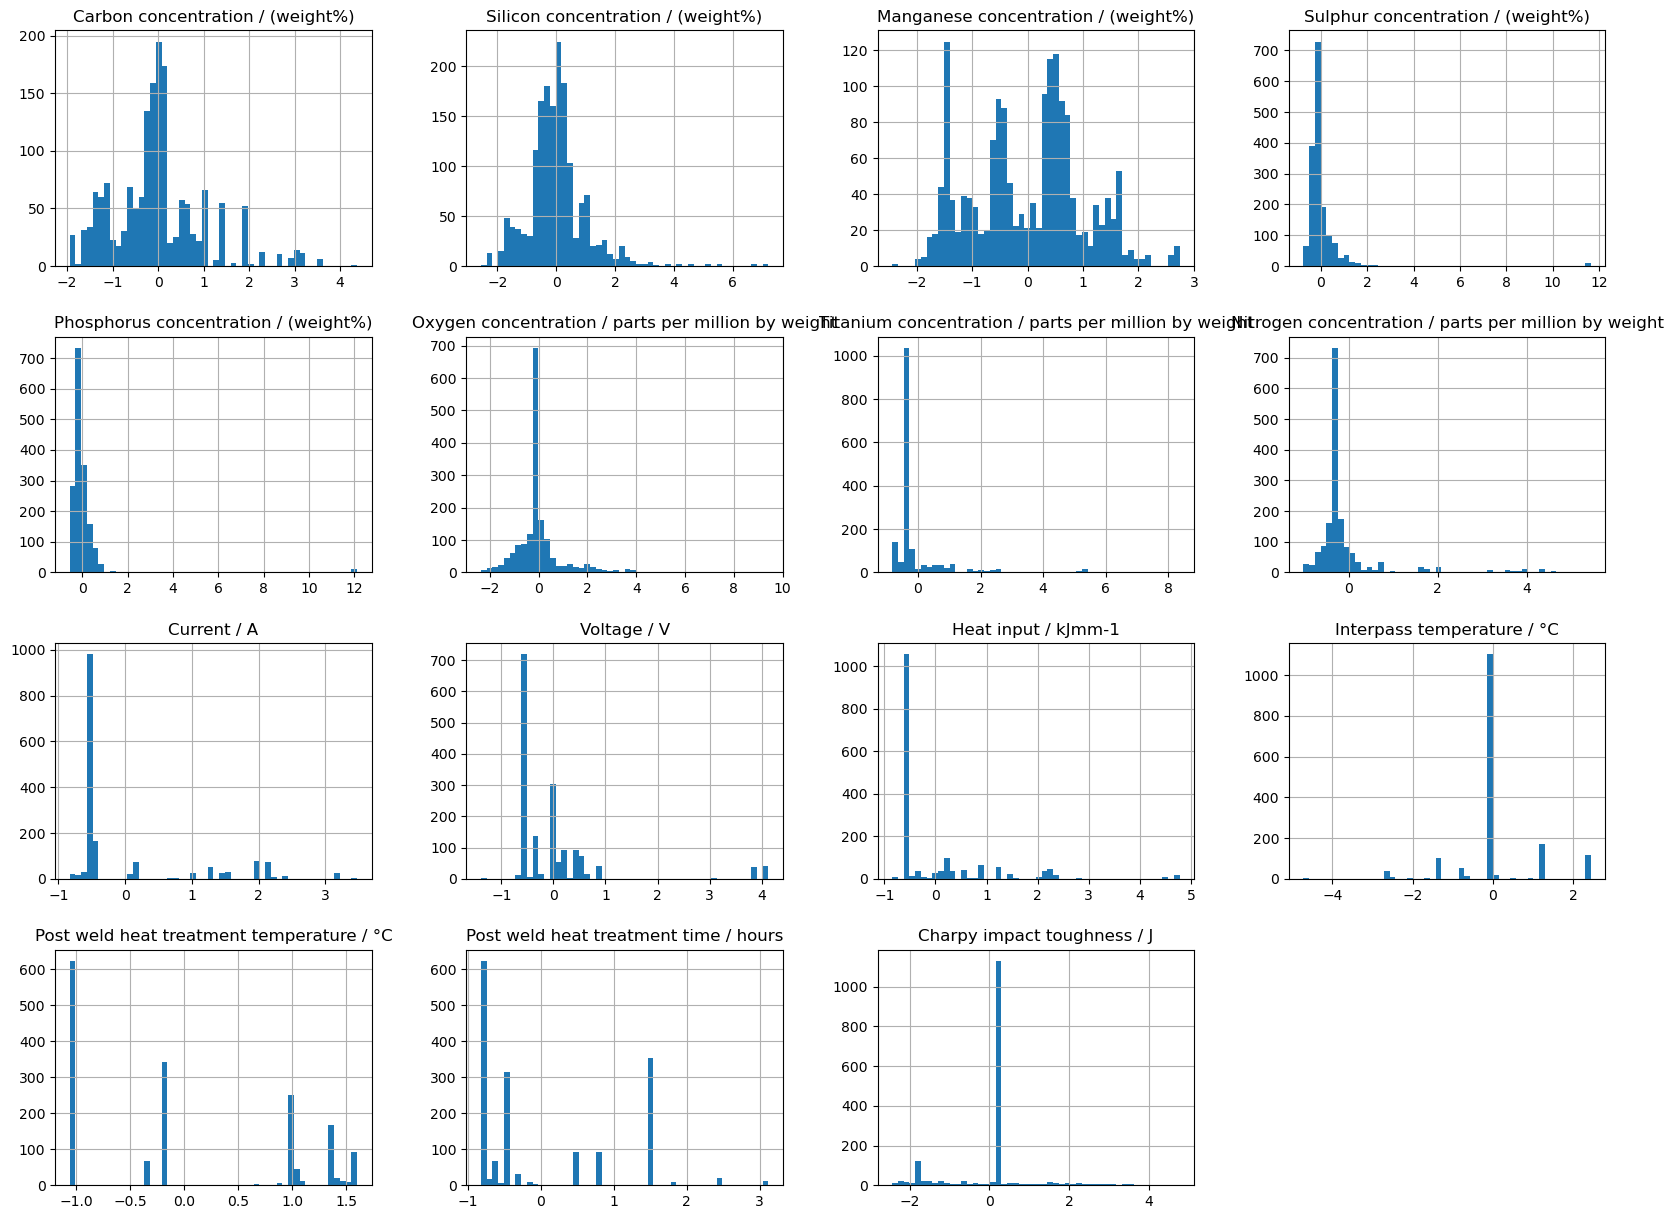

In [12]:
df.hist(bins=50, figsize=(20, 15))

In [13]:
from sklearn.preprocessing import StandardScaler

# Identify features (all columns except the target)
feature_cols = df.columns

# Initialize scaler
scaler = StandardScaler()

# Scale in place (overwrite values in df)
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Check result
print(df.head())


   Carbon concentration / (weight%)  Silicon concentration / (weight%)  \
0                         -1.612394                          -0.254200   
1                         -1.612394                          -0.254200   
2                         -1.612394                          -0.254200   
3                         -1.612394                          -0.165249   
4                         -1.612394                          -0.165249   

   Manganese concentration / (weight%)  Sulphur concentration / (weight%)  \
0                            -1.447095                          -0.137868   
1                            -1.447095                          -0.137868   
2                            -1.447095                          -0.137868   
3                            -0.452386                          -0.227149   
4                            -0.452386                          -0.227149   

   Phosphorus concentration / (weight%)  \
0                             -0.047776   
1     

array([[<Axes: title={'center': 'Carbon concentration / (weight%)'}>,
        <Axes: title={'center': 'Silicon concentration / (weight%)'}>,
        <Axes: title={'center': 'Manganese concentration / (weight%)'}>,
        <Axes: title={'center': 'Sulphur concentration / (weight%)'}>],
       [<Axes: title={'center': 'Phosphorus concentration / (weight%)'}>,
        <Axes: title={'center': 'Oxygen concentration / parts per million by weight'}>,
        <Axes: title={'center': 'Titanium concentration / parts per million by weight'}>,
        <Axes: title={'center': 'Nitrogen concentration / parts per million by weight'}>],
       [<Axes: title={'center': 'Current / A'}>,
        <Axes: title={'center': 'Voltage / V'}>,
        <Axes: title={'center': 'Heat input / kJmm-1'}>,
        <Axes: title={'center': 'Interpass temperature / °C'}>],
       [<Axes: title={'center': 'Post weld heat treatment temperature / °C'}>,
        <Axes: title={'center': 'Post weld heat treatment time / hours'}

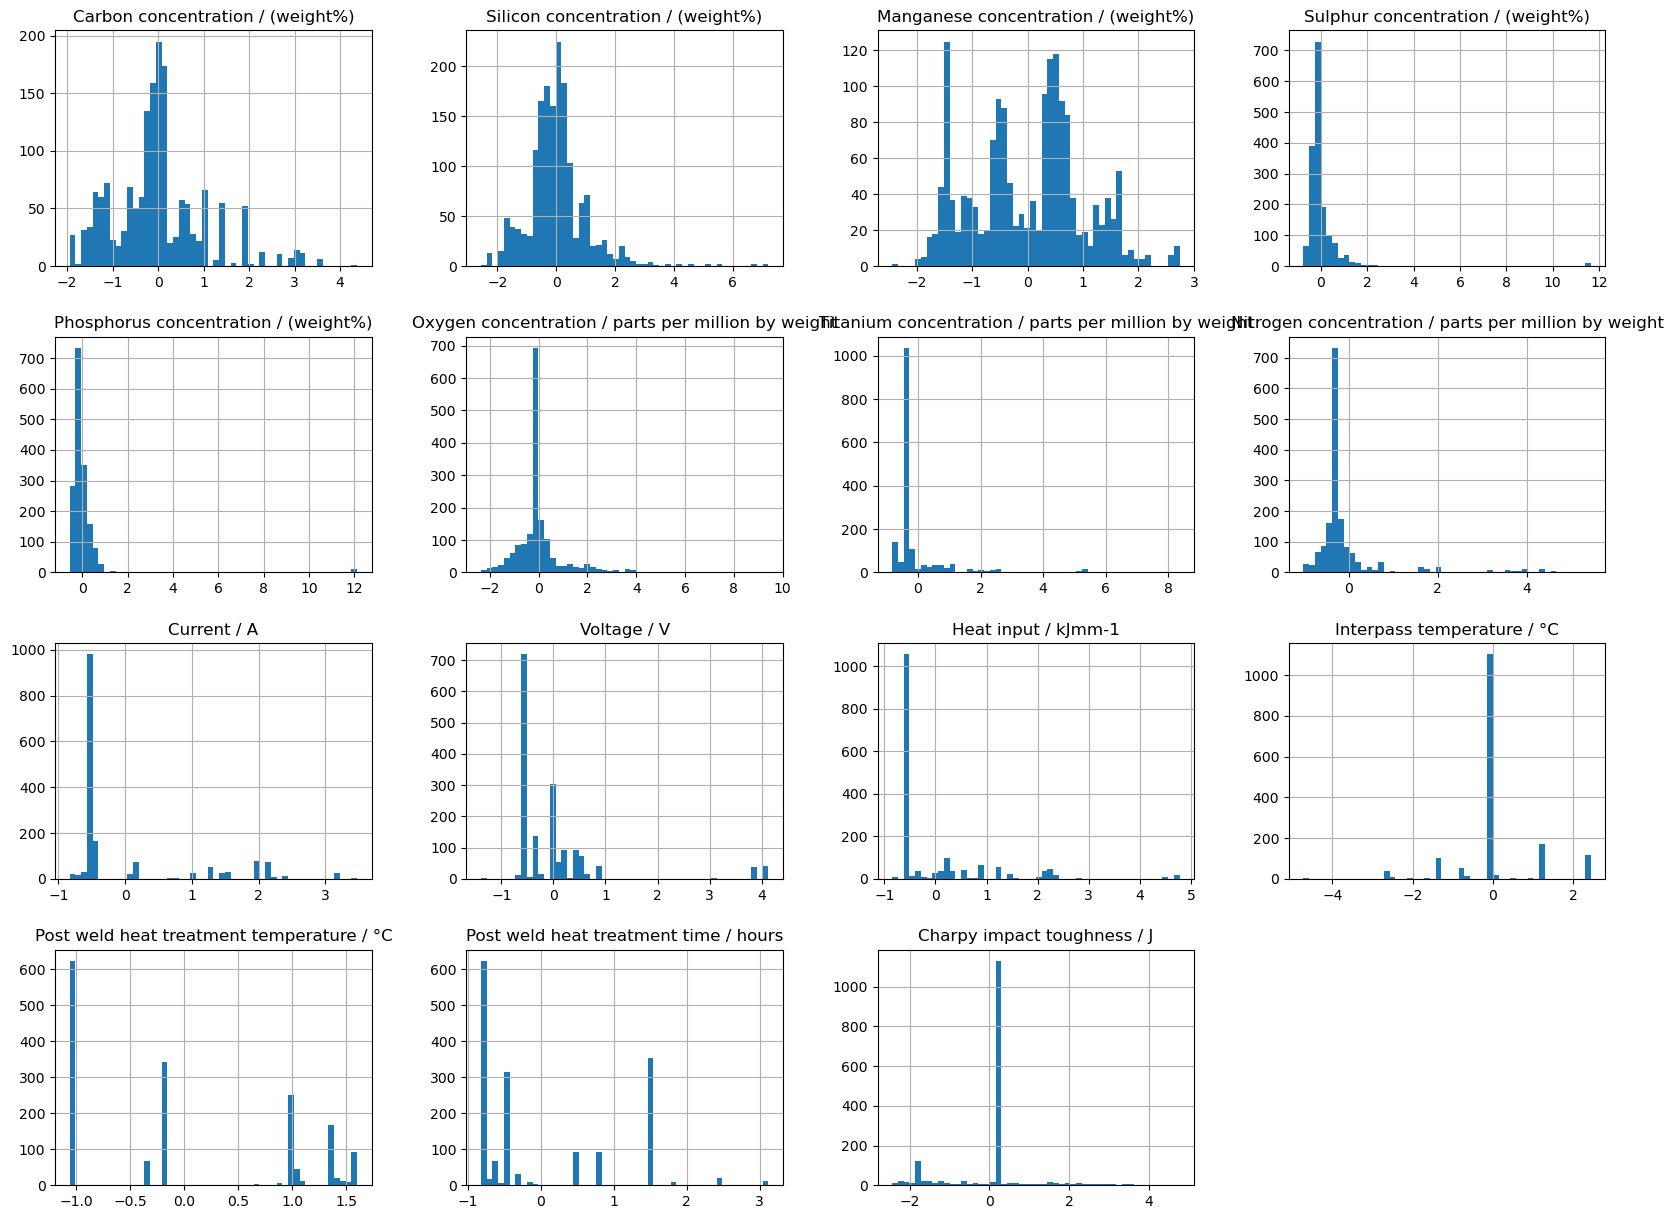

In [14]:
df.hist(bins=50, figsize=(20, 15))

## VarianceThreshold

Some columns may have almost constant values → not useful. The idea is to remove the columns with low-information, by applying the a variance threshold. 

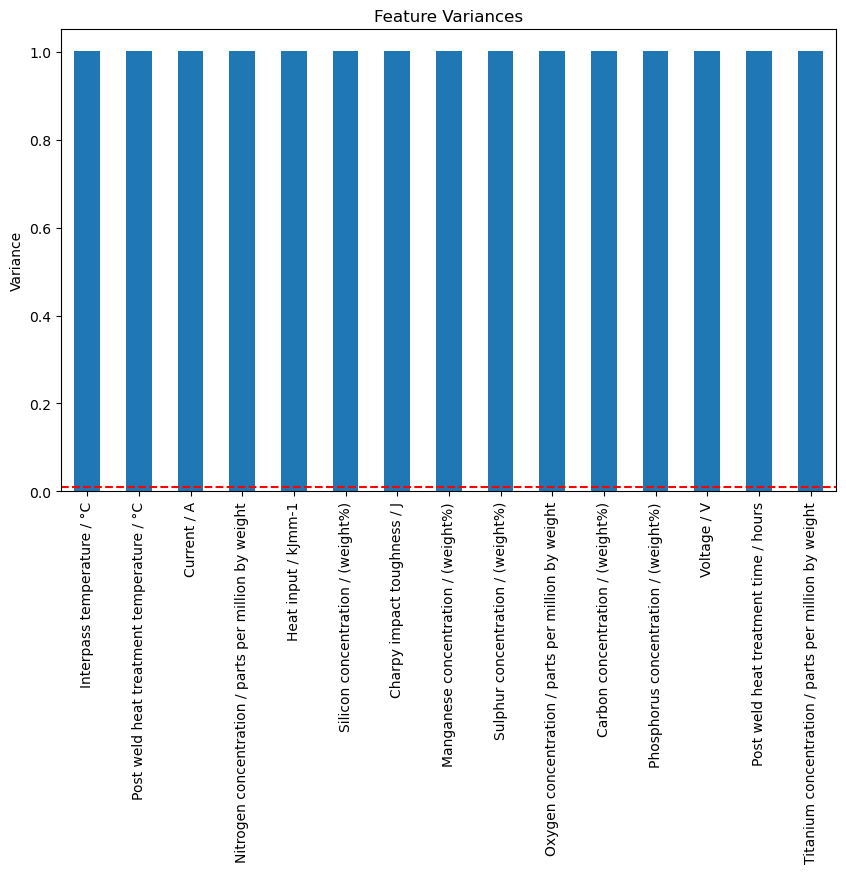

In [15]:
variances = df.var()
plt.figure(figsize=(10,6))
variances.sort_values().plot(kind="bar")
plt.axhline(y=0.01, color="r", linestyle="--")
plt.title("Feature Variances")
plt.ylabel("Variance")
plt.show()


Columns have different units / scales , then variance values are not comparable across features. Need to scale  up before applyong the variance threshold

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("var_thresh", VarianceThreshold(threshold=0.5))
])

X_reduced = pipeline.fit_transform(df.fillna(0))

# Get feature names after selection
mask = pipeline.named_steps['var_thresh'].get_support()
selected_features = df.columns[mask]
print("Kept features:", selected_features.tolist())


Kept features: ['Carbon concentration / (weight%)', 'Silicon concentration / (weight%)', 'Manganese concentration / (weight%)', 'Sulphur concentration / (weight%)', 'Phosphorus concentration / (weight%)', 'Oxygen concentration / parts per million by weight', 'Titanium concentration / parts per million by weight', 'Nitrogen concentration / parts per million by weight', 'Current / A', 'Voltage / V', 'Heat input / kJmm-1', 'Interpass temperature / °C', 'Post weld heat treatment temperature / °C', 'Post weld heat treatment time / hours', 'Charpy impact toughness / J']


In [17]:
print(len(selected_features))

15


## Correlation filtering

The idea is to remove redundant features; if any two columns are highly correlated.

In [18]:
corr_matrix = df.corr().abs()  # absolute correlation


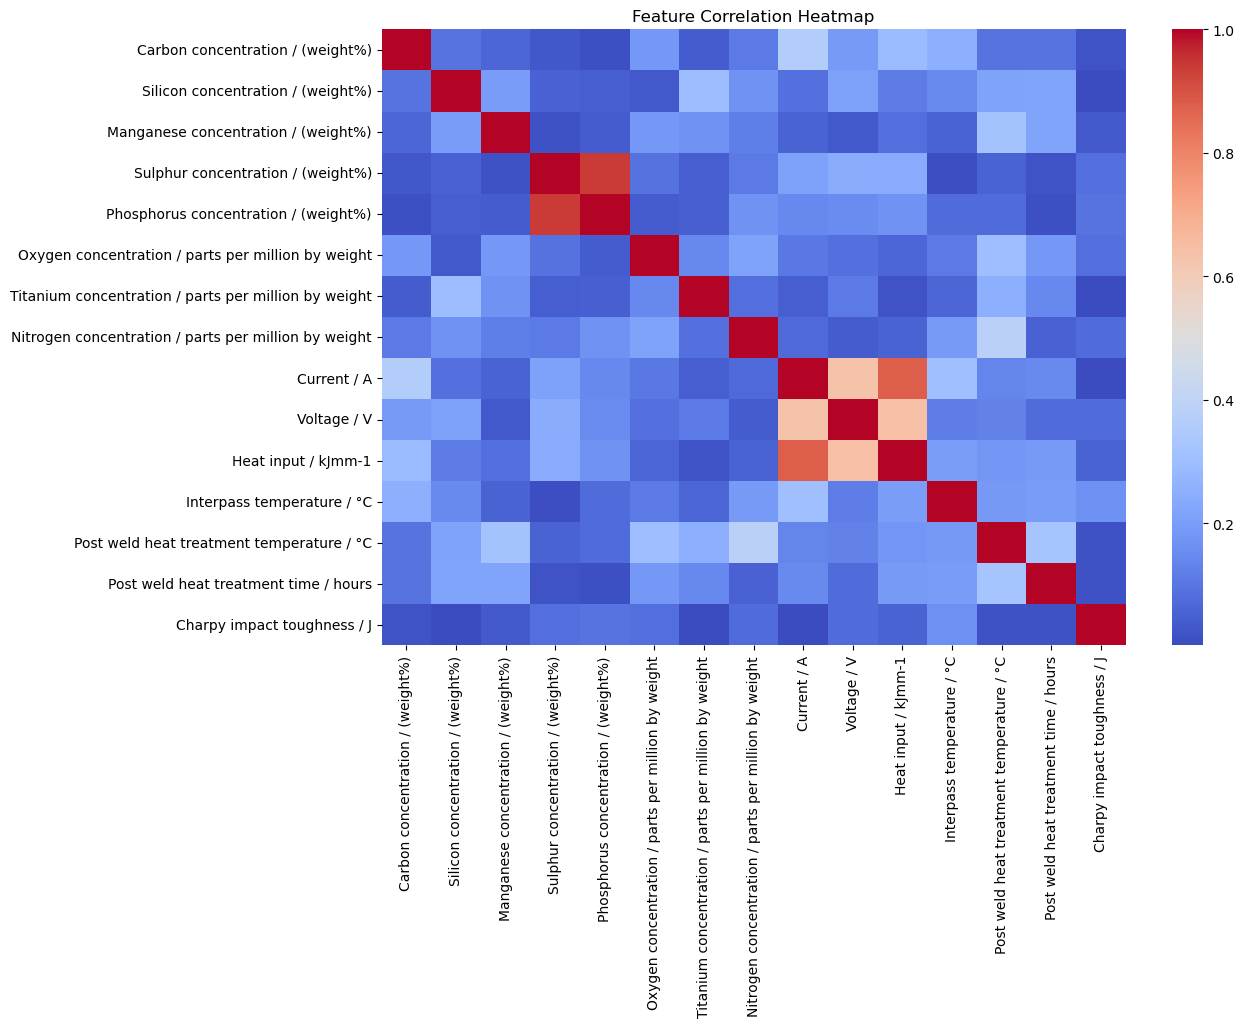

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


## PCA 

Project features into fewer dimensions while keeping maximum variance.

In [20]:
X = df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
X_scaled.shape

(1652, 15)

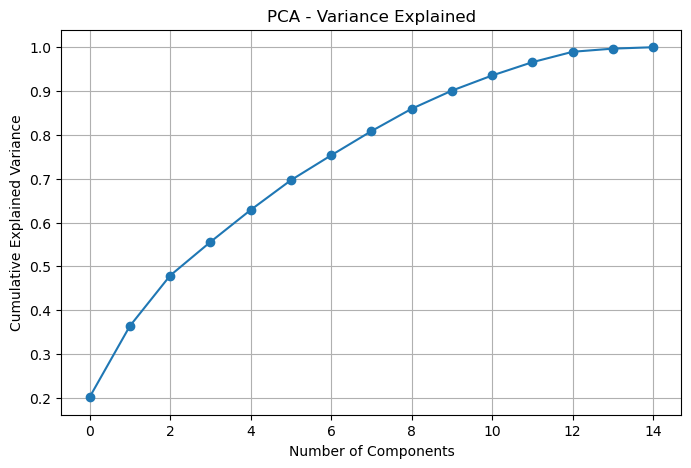

In [22]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance plot
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Variance Explained")
plt.grid(True)
plt.show()


NB: (previous curve )
- The curve rises steeply at the beginning (first ~10 components) → those capture most of the variance.

- After around 15–18 components, the slope flattens → each new component adds only a tiny bit more variance.

- Beyond ~25 components, close to 95–98% cumulative variance → adding more doesn’t bring much.

In [23]:
pca = PCA(n_components=0.95)  # keep 95% variance or maybe only
X_reduced = pca.fit_transform(X_scaled)

print("Original shape:", X.shape)
print("Reduced shape:", X_reduced.shape)


Original shape: (1652, 15)
Reduced shape: (1652, 12)


Test 3 components 

In [24]:
from sklearn.decomposition import PCA

# 3-component PCA
pca_3d = PCA(n_components=3)
X_pca3 = pca_3d.fit_transform(X_scaled)

print("Original shape:", X_scaled.shape)
print("Reduced shape (3 PCs):", X_pca3.shape)


Original shape: (1652, 15)
Reduced shape (3 PCs): (1652, 3)


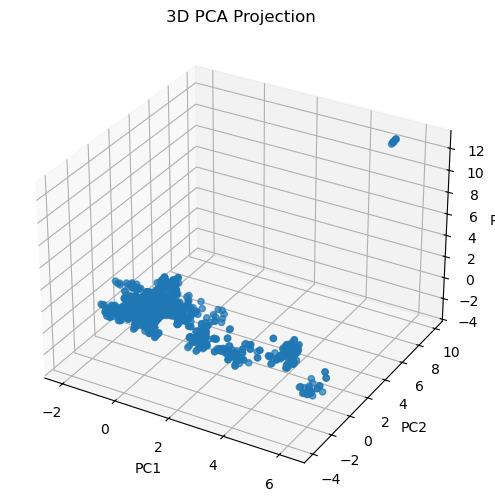

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plots

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# scatter plot of first 3 PCs
ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], alpha=0.7)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Projection")

plt.show()


In [58]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                        index=df.columns)
print(loadings.head())


                                           PC1       PC2       PC3
Carbon concentration / (weight%)      0.244322 -0.000017 -0.253836
Silicon concentration / (weight%)    -0.048973 -0.313723  0.295905
Manganese concentration / (weight%)   0.112298 -0.269534  0.242357
Sulphur concentration / (weight%)     0.264493  0.315792  0.509249
Phosphorus concentration / (weight%)  0.219894  0.321896  0.546309
